<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df.info

<bound method DataFrame.info of      Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       

## Median value of owner-occupied homes

In [13]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [17]:
boston_df['MEDV'].median()

21.2

Text(0.5, 1.0, 'Owner-occupied homes')

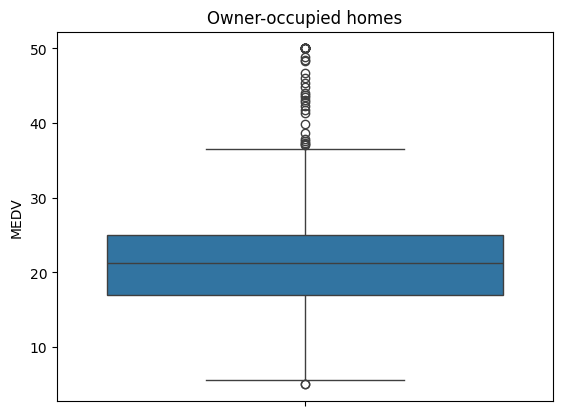

In [18]:
ax1 = sns.boxplot(y = 'MEDV', data = boston_df)
ax1.set_title('Owner-occupied homes')

The boxplot above shows the median value for the variable MEDV is around **21**

## Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, 'Number of homes near the Charles River')

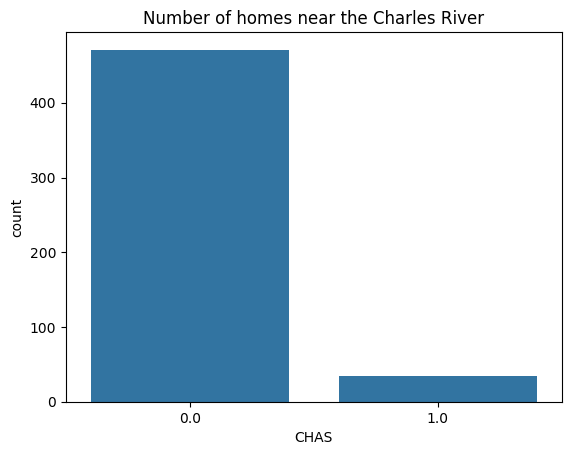

In [23]:
ax2 = sns.countplot(x = 'CHAS', data = boston_df)
ax2.set_title('Number of homes near the Charles River')


Very few houses are near Charles River
Out of 505 only 35 houses are near Charles River

In [38]:
boston_df[boston_df['CHAS']==1]['CHAS'].count()

35

## boxplot for the MEDV variable vs the AGE variable
### Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older

In [39]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

Text(0.5, 1.0, 'Median value of owner-occupied homes per Age Group')

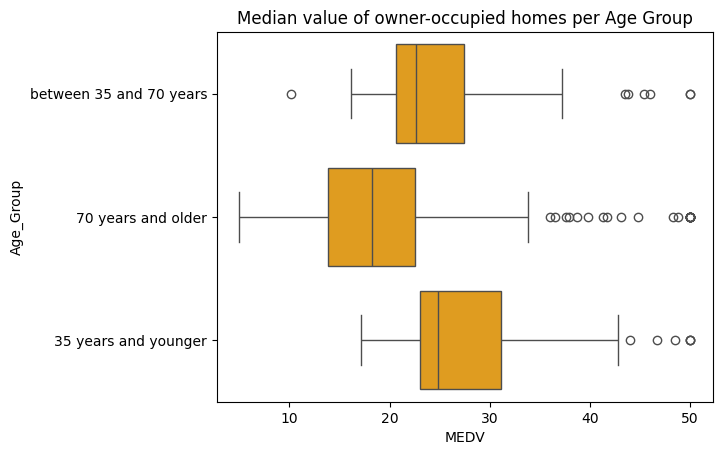

In [54]:

ax3 = sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df, color='Orange')
ax3.set_title('Median value of owner-occupied homes per Age Group')


Median of owner occupied homes are more, when age is less. 

## scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

Text(0.5, 1.0, 'Nitric oxide concentration per proportion of non-retail business acres per town')

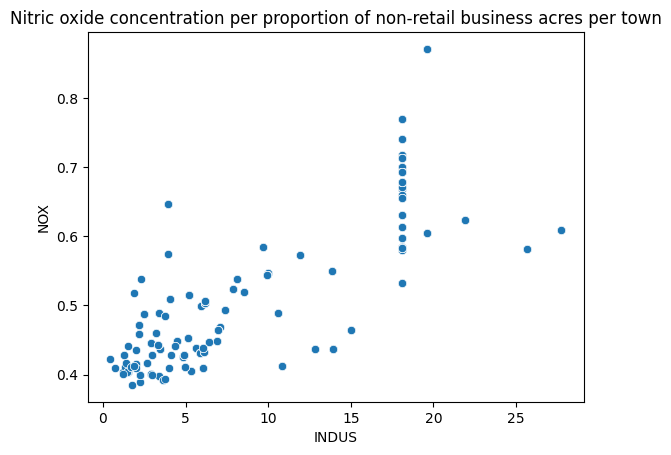

In [59]:
ax4 = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
ax4.set_title('Nitric oxide concentration per proportion of non-retail business acres per town')

#### low Nitric oxide concentration is present at low proportion of non-retail business acres per town
##### Seems High non-retail business produce more Nitric oxide

## histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Pupil to teacher ratio per town')

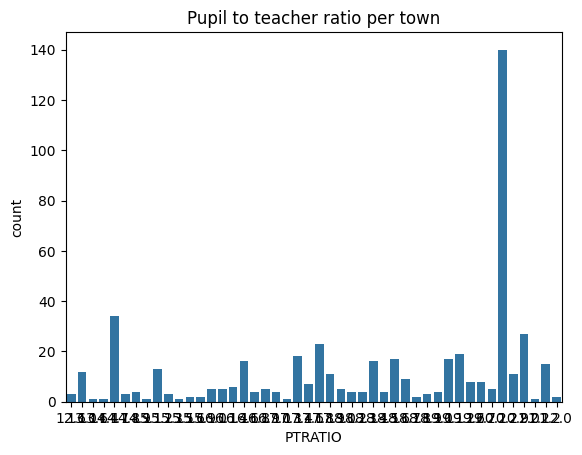

In [60]:
ax5 = sns.countplot(x = 'PTRATIO', data = boston_df)
ax5.set_title('Pupil to teacher ratio per town')

# Hypothesis Testing

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**Null Hypothesis** -> There's no significant difference in median value between houses bounded and not bounded by the Charles River

**Alternative Hypothesis** -> There's a significant difference in median value between houses bounded and not bounded by the Charles River

In [62]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_T'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_T'] = 'NEAR'
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group,CHAS_T
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years,FAR
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older,FAR
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years,FAR
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years,FAR
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years,FAR


In [63]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'], 
                      boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

p-value= 0.000074 < 0.05, hence we reject the Null Hypothesis.  
There is not a statistical difference in median value betwenn houses near the Charles River and houses far away

###  Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**Null Hypotesis**: There is no statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940 

**Alternative Hypothesis**: There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

In [69]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
tab = sm.stats.anova_lm(lm)
print(tab)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


p-value < 0.05, we fail to accept the Null Hypothesis.  

There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Null Hypothesis**: Nitric Oxide concentration is not related to proportion of non-retail business acres per town

**Alternative Hypothesis**: Nitric Oxide concentration is related with the proportion of non-retail business acres per town

In [70]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Pearson Coefficient is 0.76365 ==> p-value < 0.05.  We reject the Null Hypothesis.  
There is a relation between Nitric oxide concentration and proportion of non-retail business acres per town.


### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


In [71]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        10:11:43   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""